# README
- This file is used to check anchor stations for different years and different cities.

In [1]:
import pandas as pd

In [2]:
GS_data_set = {}
CS_data_set = {}

for year in range(2013,2026):
    GS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/GS_cleaned/GS_data_cleaned_{year}.parquet")
    print(year," GS ",len(GS_data_set[year]))
for year in range(2015,2026):
    CS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/CS_cleaned/CS_data_cleaned_{year}.parquet")
    print(year," CS ",len(CS_data_set[year]))

2013  GS  98458
2014  GS  102642
2015  GS  117307
2016  GS  118338
2017  GS  118193
2018  GS  104177
2019  GS  109464
2020  GS  113399
2021  GS  116279
2022  GS  105157
2023  GS  112000
2024  GS  113219
2025  GS  114421
2015  CS  1829
2016  CS  1870
2017  CS  4220
2018  CS  33175
2019  CS  56250
2020  CS  72149
2021  CS  93798
2022  CS  96181
2023  CS  118293
2024  CS  182254
2025  CS  265110


In [3]:
import numpy as np

match_columns = ['pname','cityname','adname','address','name','大类','中类','小类']

GS_anchor_results = {}
GS_distance_stats = {}

for year in range(2013, 2025):
    if year + 1 not in GS_data_set or year not in GS_data_set:
        continue
    df1 = GS_data_set[year]
    df2 = GS_data_set[year + 1]
    # Address filter
    df1 = df1[df1['address'].str.strip().ne('') & df1['address'].str.strip().ne('[]')]
    df2 = df2[df2['address'].str.strip().ne('') & df2['address'].str.strip().ne('[]')]
    # Merge
    merged = pd.merge(df1, df2, on=match_columns, suffixes=('_prev', '_next'))
    GS_anchor_results[year] = merged
    # City stats
    city_counts = merged['cityname'].value_counts().to_dict()
    print(f"Year {year}: matched anchor stations per city:", city_counts)
    # Distance calculation
    merged['shift_x'] = (merged['wgs84_x_next'] - merged['wgs84_x_prev']) * 100000
    merged['shift_y'] = (merged['wgs84_y_next'] - merged['wgs84_y_prev']) * 100000
    GS_distance_stats[year] = {
        'shift_x': merged['shift_x'].describe().to_dict(),
        'shift_y': merged['shift_y'].describe().to_dict()
    }

CS_anchor_results = {}
CS_distance_stats = {}

for year in range(2015, 2025):
    if year + 1 not in CS_data_set or year not in CS_data_set:
        continue
    df1 = CS_data_set[year]
    df2 = CS_data_set[year + 1]
    # Address filter
    df1 = df1[df1['address'].str.strip().ne('') & df1['address'].str.strip().ne('[]')]
    df2 = df2[df2['address'].str.strip().ne('') & df2['address'].str.strip().ne('[]')]
    # Merge
    merged = pd.merge(df1, df2, on=match_columns, suffixes=('_prev', '_next'))
    CS_anchor_results[year] = merged
    # City stats
    city_counts = merged['cityname'].value_counts().to_dict()
    print(f"Year {year}: matched anchor stations per city:", city_counts)
    # Distance calculation
    merged['shift_x'] = (merged['wgs84_x_next'] - merged['wgs84_x_prev']) * 100000
    merged['shift_y'] = (merged['wgs84_y_next'] - merged['wgs84_y_prev']) * 100000
    GS_distance_stats[year] = {
        'shift_x': merged['shift_x'].describe().to_dict(),
        'shift_y': merged['shift_y'].describe().to_dict()
    }

Year 2013: matched anchor stations per city: {'上海市': 217, '北京市': 114, '成都市': 61, '济南市': 30, '杭州市': 25, '广州市': 24, '宁波市': 23, '天津市': 23, '深圳市': 20, '济宁市': 18, '哈尔滨市': 16, '长春市': 14, '乌鲁木齐市': 14, '武汉市': 14, '包头市': 12, '南宁市': 12, '青岛市': 10, '南昌市': 10, '运城市': 10, '石家庄市': 9, '沈阳市': 9, '重庆市': 9, '南京市': 9, '东营市': 9, '和田地区': 8, '大连市': 8, '辽阳市': 8, '扬州市': 7, '铜陵市': 7, '衢州市': 7, '日照市': 7, '威海市': 6, '太原市': 6, '南通市': 6, '兰州市': 6, '芜湖市': 6, '绵阳市': 6, '烟台市': 6, '安庆市': 6, '洛阳市': 5, '莱芜市': 5, '中山市': 5, '临沂市': 5, '东莞市': 5, '长沙市': 5, '宿州市': 5, '合肥市': 5, '岳阳市': 5, '苏州市': 5, '海西蒙古族藏族自治州': 5, '珠海市': 4, '无锡市': 4, '吐鲁番市': 4, '西双版纳傣族自治州': 4, '吉林市': 4, '嘉兴市': 4, '厦门市': 4, '三亚市': 4, '恩施土家族苗族自治州': 4, '银川市': 4, '湘潭市': 3, '白银市': 3, '果洛藏族自治州': 3, '连云港市': 3, '鄂州市': 3, '邢台市': 3, '十堰市': 3, '海北藏族自治州': 3, '齐齐哈尔市': 3, '唐山市': 3, '海口市': 3, '盐城市': 3, '惠州市': 3, '呼和浩特市': 3, '昆明市': 3, '巴音郭楞蒙古自治州': 3, '玉溪市': 3, '宣城市': 3, '菏泽市': 3, '淄博市': 3, '德阳市': 3, '绍兴市': 2, '保定市': 2, '郴州市': 2, '新乡市': 2, '绥化市': 2, '湖州市': 2, '衡水市': 2, '德州市': 2

In [4]:
GS_anchor_results[2013]

,name,address,wgs84_x_prev,wgs84_y_prev,tel_prev,pname,cityname,adname,大类,中类,...,paused_prev,wgs84_x_next,wgs84_y_next,tel_next,pname_EN_next,cityname_EN_next,corporation_next,paused_next,shift_x,shift_y
0,九环汽车液化加气站,曹家堰路３８,121.429478,31.215804,,上海市,上海市,长宁区,汽车服务,加气站,...,0,121.434101,31.213939,,Shanghai,Shanghai,Other,0,462.282025,-186.536230
1,加油站（可乐东路）,哈密路８００－１,121.363170,31.205570,,上海市,上海市,长宁区,汽车服务,加油站,...,0,121.367791,31.203698,,Shanghai,Shanghai,CPCC,0,462.106128,-187.194807
2,加油站（双泾寺角落综合小区东）,北翟路１４４２,121.338541,31.226073,,上海市,上海市,长宁区,汽车服务,加油站,...,0,121.343117,31.224171,,Shanghai,Shanghai,CPCC,0,457.611705,-190.177853
3,加油站（天山路）,天山路９０,121.375725,31.217936,,上海市,上海市,长宁区,汽车服务,加油站,...,0,121.380364,31.216084,,Shanghai,Shanghai,CPCC,0,463.850289,-185.203959
4,华江石油加油站（赵重公路）,重固镇,121.181493,31.192347,,上海市,上海市,青浦区,汽车服务,加油站,...,0,121.186178,31.190486,,Shanghai,Shanghai,Other,0,468.507624,-186.088196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,加油站（富兴北路）,新兴东路２,126.472774,45.537524,,黑龙江省,哈尔滨市,双城区,汽车服务,加油站,...,0,126.479009,45.539720,,Heilongjiang Province,Harbin City,CNPC,0,623.466672,219.636454
1070,北街加油站,北大街４３４,126.599548,45.993272,0451-82302588,黑龙江省,哈尔滨市,呼兰区,汽车服务,加油站,...,0,126.605469,45.995045,0451-82302588,Heilongjiang Province,Harbin City,CPCC,0,592.142859,177.296706
1071,泰运加油站,建设路７４０,123.418733,46.417812,,黑龙江省,齐齐哈尔市,泰来县,汽车服务,加油站,...,0,123.425604,46.419834,0452-8226770,Heilongjiang Province,Qiqihar City,Other,0,687.067739,202.196627
1072,加油站（青云小区东）,南马路３０９,123.946617,47.331601,,黑龙江省,齐齐哈尔市,龙沙区,汽车服务,加油站,...,0,123.953506,47.333725,,Heilongjiang Province,Qiqihar City,CNPC,0,688.926481,212.359863


In [5]:
for year in range(2013,2025):
    print("Year: ",year," ",len(GS_anchor_results[year]), len(GS_data_set[year]))

Year:  2013   1074 98458
Year:  2014   1155 102642
Year:  2015   117035 117307
Year:  2016   33933 118338
Year:  2017   17682 118193
Year:  2018   32568 104177
Year:  2019   52716 109464
Year:  2020   66624 113399
Year:  2021   40078 116279
Year:  2022   89871 105157
Year:  2023   101625 112000
Year:  2024   84074 113219


In [6]:
for year in range(2013,2025):
    print("year:", year, " GS_anchor_results:", len(GS_anchor_results[year]['cityname'].value_counts()), " GS_data_set:", len(GS_data_set[year]['cityname'].value_counts()))

year: 2013  GS_anchor_results: 161  GS_data_set: 365
year: 2014  GS_anchor_results: 261  GS_data_set: 365
year: 2015  GS_anchor_results: 365  GS_data_set: 365
year: 2016  GS_anchor_results: 357  GS_data_set: 365
year: 2017  GS_anchor_results: 353  GS_data_set: 365
year: 2018  GS_anchor_results: 359  GS_data_set: 365
year: 2019  GS_anchor_results: 365  GS_data_set: 365
year: 2020  GS_anchor_results: 365  GS_data_set: 366
year: 2021  GS_anchor_results: 364  GS_data_set: 367
year: 2022  GS_anchor_results: 366  GS_data_set: 366
year: 2023  GS_anchor_results: 367  GS_data_set: 367
year: 2024  GS_anchor_results: 367  GS_data_set: 367


In [7]:
for year in range(2015,2025):
    print("year:", year, " CS_anchor_results:", len(CS_anchor_results[year]['cityname'].value_counts()), " CS_data_set:", len(CS_data_set[year]['cityname'].value_counts()))

year: 2015  CS_anchor_results: 198  CS_data_set: 201
year: 2016  CS_anchor_results: 122  CS_data_set: 201
year: 2017  CS_anchor_results: 82  CS_data_set: 232
year: 2018  CS_anchor_results: 309  CS_data_set: 340
year: 2019  CS_anchor_results: 340  CS_data_set: 347
year: 2020  CS_anchor_results: 354  CS_data_set: 358
year: 2021  CS_anchor_results: 350  CS_data_set: 364
year: 2022  CS_anchor_results: 358  CS_data_set: 363
year: 2023  CS_anchor_results: 364  CS_data_set: 365
year: 2024  CS_anchor_results: 366  CS_data_set: 368


In [20]:
tmp_year = 2016
df = GS_anchor_results[tmp_year]
result = (
    df.groupby(['pname', 'cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)
print(f"Year: {tmp_year}")
result

Year: 2016


,pname,cityname,shift_x_median,shift_y_median,anchor_count
0,上海市,上海市,-447.870750,200.400816,273
1,云南省,临沧市,-105.314397,282.587040,28
2,云南省,丽江市,-114.256219,356.073158,24
3,云南省,保山市,-80.466158,294.788929,50
4,云南省,大理白族自治州,-111.040106,308.204249,58
...,...,...,...,...,...
352,黑龙江省,绥化市,-650.735949,-201.374262,103
353,黑龙江省,鸡西市,-746.643583,-221.010219,53
354,黑龙江省,鹤岗市,-781.375211,-238.547146,17
355,黑龙江省,黑河市,-721.488202,-207.375049,50


In [16]:
tmp_year = 2021
df = CS_anchor_results[tmp_year]
result = (
    df.groupby(['pname', 'cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)
print(f"Year: {tmp_year}")
result

Year: 2021


,pname,cityname,shift_x_median,shift_y_median,anchor_count
0,上海市,上海市,0.000000,0.000000,1385
1,云南省,临沧市,0.078360,0.073207,7
2,云南省,丽江市,-0.097370,-0.148939,9
3,云南省,保山市,-0.034588,-0.114277,18
4,云南省,大理白族自治州,-0.134094,0.161371,26
...,...,...,...,...,...
345,黑龙江省,大庆市,-655.352667,-179.770248,8
346,黑龙江省,绥化市,-636.554246,-191.359293,2
347,黑龙江省,鹤岗市,-775.123305,-238.743894,1
348,黑龙江省,黑河市,-724.863252,-197.123675,2


In [10]:
import matplotlib.pyplot as plt

def plot_anchor_shift_distribution(anchor_dict, year):
    df = anchor_dict[year]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    for i, col in enumerate(['shift_x', 'shift_y']):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f"{col} distribution in {year}")
        q1 = df[col].quantile(0.25)
        median = df[col].median()
        q3 = df[col].quantile(0.75)
        print(f"{col} - Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, len: {len(df[col])}")
    plt.tight_layout()
    plt.show()


上海市, Year: 2020
shift_x - Q1: -0.00, Median: -0.00, Q3: 0.00, len: 557
shift_y - Q1: -0.00, Median: 0.00, Q3: 0.00, len: 557


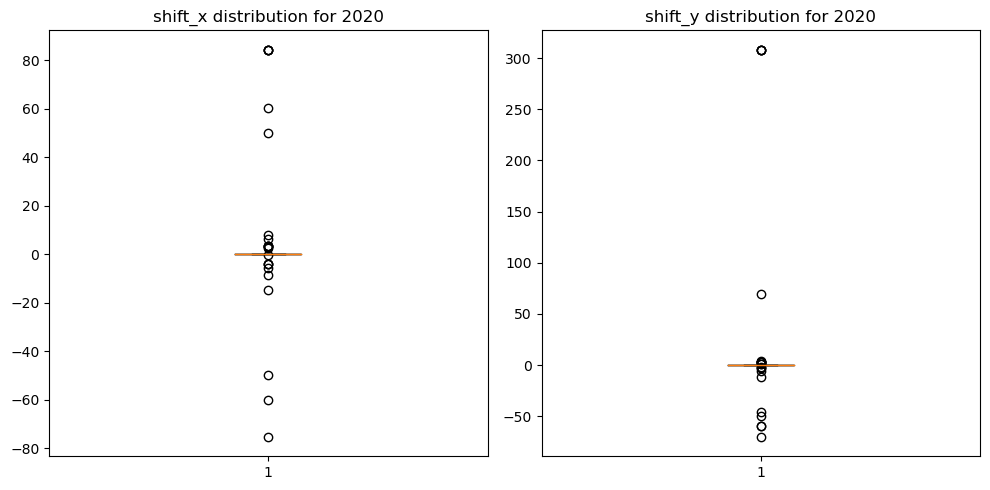

In [11]:
tmp_year = 2020
tmp_area = '上海市'
tmp_data = GS_anchor_results[tmp_year][GS_anchor_results[tmp_year]['cityname'] == tmp_area]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
print(f"{tmp_area}, Year: {tmp_year}")
for i, col in enumerate(['shift_x', 'shift_y']):
    axes[i].boxplot(tmp_data[col].dropna())
    axes[i].set_title(f"{col} distribution for {tmp_year}")
    q1 = tmp_data[col].quantile(0.25)
    median = tmp_data[col].median()
    q3 = tmp_data[col].quantile(0.75)
    print(f"{col} - Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, len: {len(tmp_data[col])}")
plt.tight_layout()
plt.show()

Province: 上海市, Year: 2013
shift_x - Q1: 433.07, Median: 447.83, Q3: 460.83, len: 217
shift_y - Q1: -212.26, Median: -197.92, Q3: -188.71, len: 217


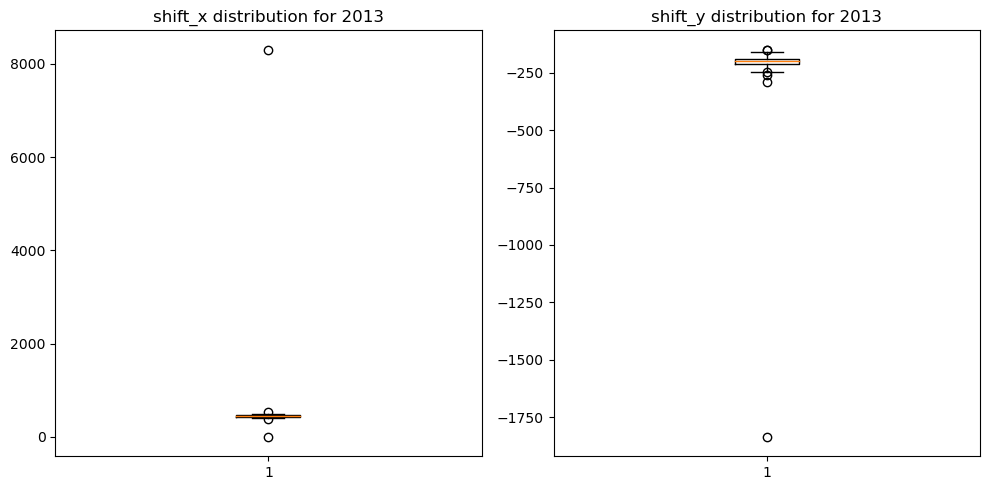

Province: 云南省, Year: 2013
shift_x - Q1: 113.34, Median: 126.71, Q3: 143.14, len: 14
shift_y - Q1: -301.70, Median: -291.80, Q3: -284.72, len: 14


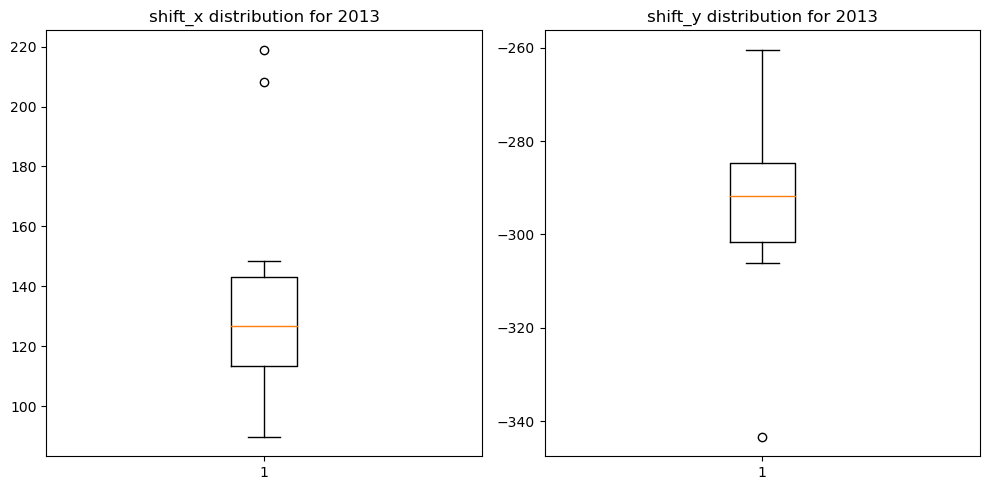

Province: 内蒙古自治区, Year: 2013
shift_x - Q1: 566.55, Median: 583.19, Q3: 616.90, len: 17
shift_y - Q1: 110.35, Median: 130.07, Q3: 135.80, len: 17


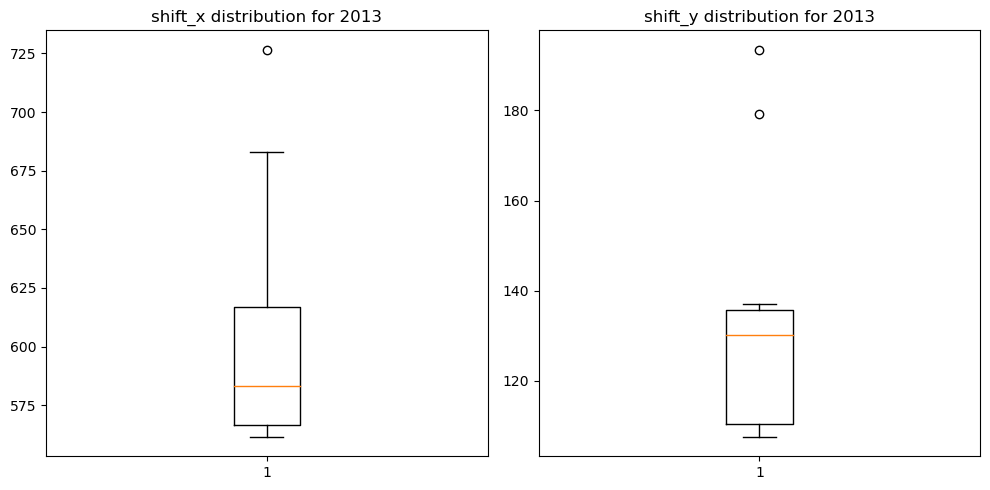

Province: 北京市, Year: 2013
shift_x - Q1: 595.46, Median: 608.39, Q3: 621.53, len: 114
shift_y - Q1: 116.46, Median: 126.92, Q3: 136.96, len: 114


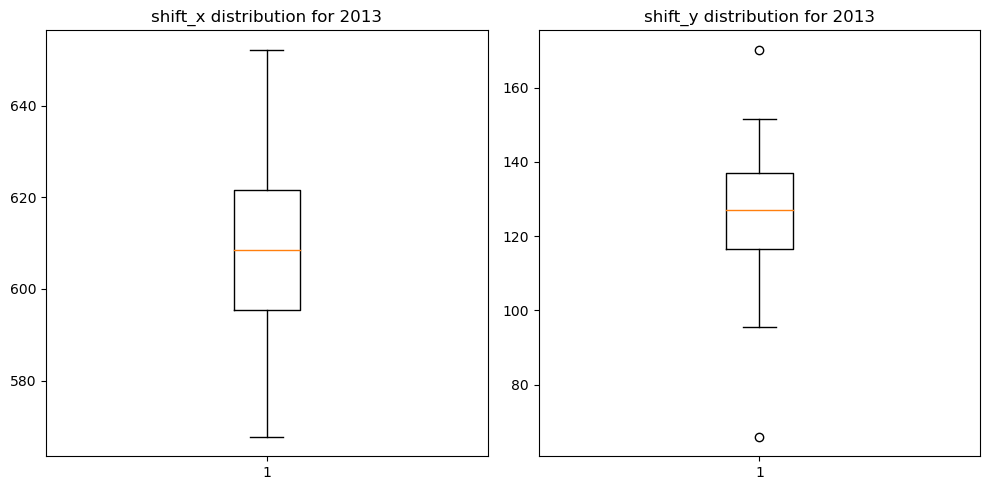

Province: 吉林省, Year: 2013
shift_x - Q1: 621.10, Median: 648.46, Q3: 658.79, len: 18
shift_y - Q1: 222.32, Median: 239.41, Q3: 245.25, len: 18


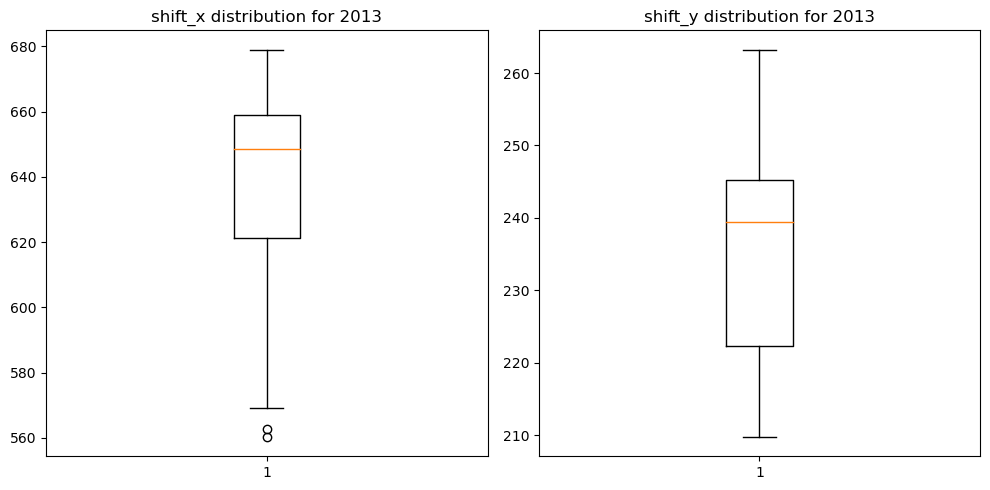

Province: 四川省, Year: 2013
shift_x - Q1: 238.35, Median: 247.97, Q3: 254.01, len: 73
shift_y - Q1: -252.19, Median: -243.12, Q3: -238.01, len: 73


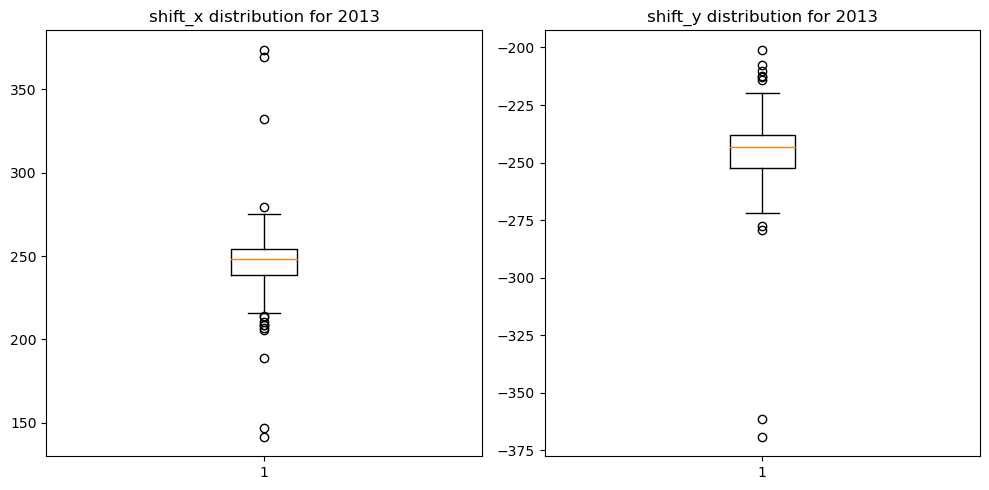

Province: 天津市, Year: 2013
shift_x - Q1: 615.62, Median: 627.90, Q3: 640.17, len: 23
shift_y - Q1: 72.96, Median: 102.05, Q3: 108.91, len: 23


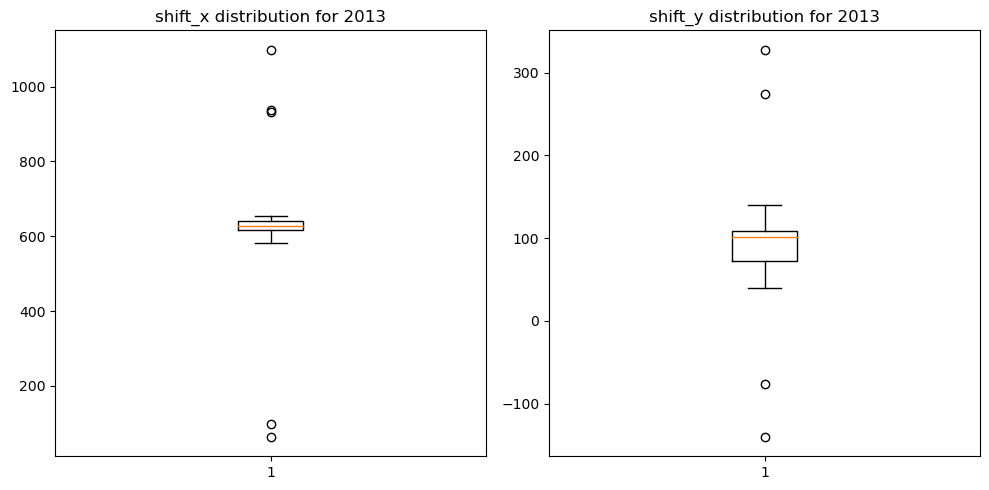

Province: 宁夏回族自治区, Year: 2013
shift_x - Q1: 445.01, Median: 446.61, Q3: 453.98, len: 7
shift_y - Q1: 50.02, Median: 56.77, Q3: 61.64, len: 7


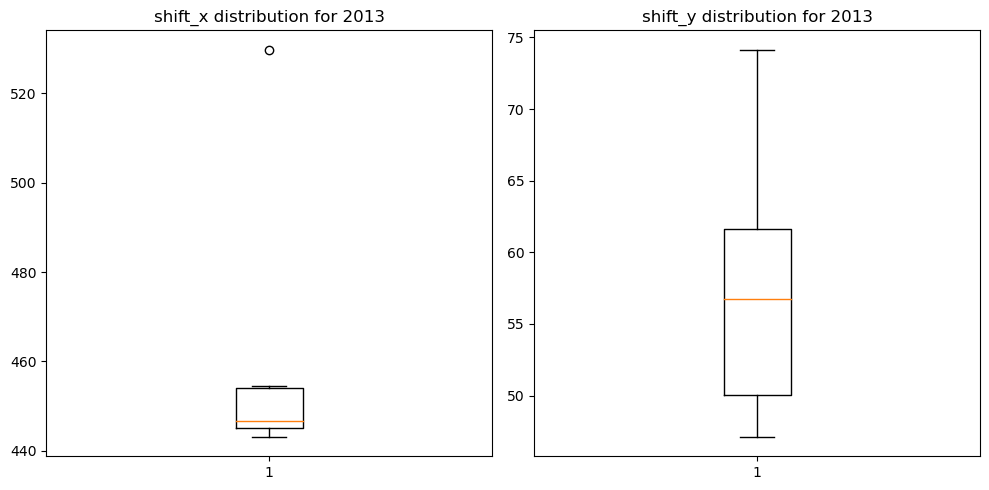

Province: 安徽省, Year: 2013
shift_x - Q1: 519.02, Median: 536.82, Q3: 546.28, len: 37
shift_y - Q1: -233.62, Median: -195.21, Q3: -180.15, len: 37


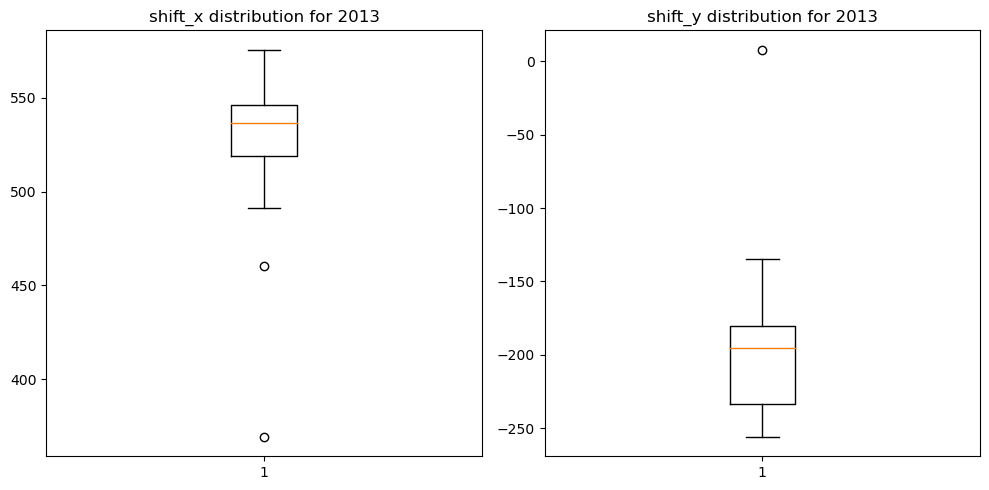

Province: 山东省, Year: 2013
shift_x - Q1: 547.05, Median: 573.68, Q3: 590.27, len: 106
shift_y - Q1: -6.79, Median: 22.97, Q3: 48.18, len: 106


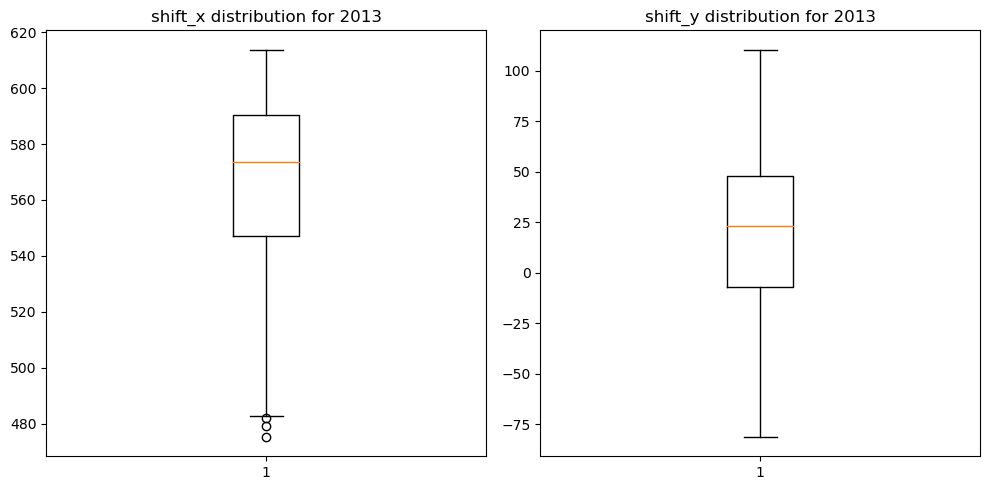

Province: 山西省, Year: 2013
shift_x - Q1: 568.53, Median: 577.41, Q3: 628.79, len: 18
shift_y - Q1: -79.20, Median: -51.05, Q3: 50.66, len: 18


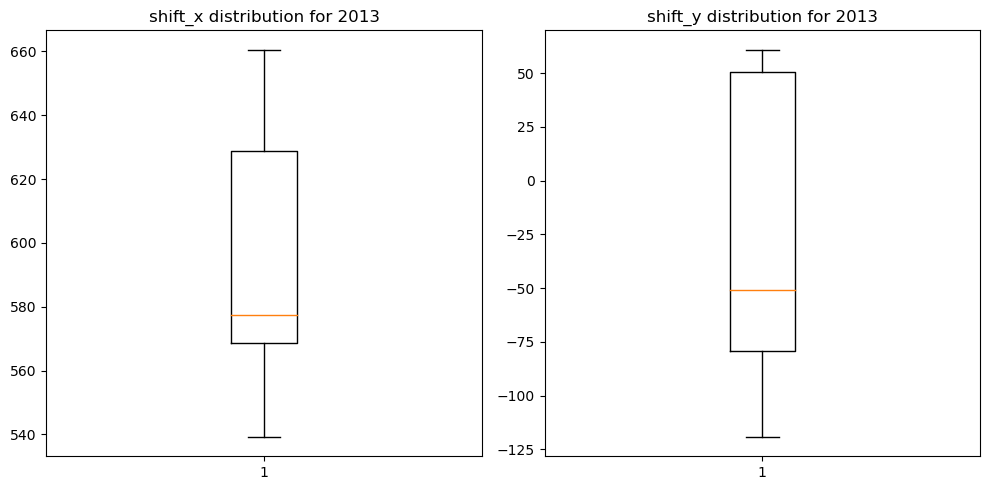

Province: 广东省, Year: 2013
shift_x - Q1: 502.16, Median: 511.15, Q3: 532.35, len: 66
shift_y - Q1: -286.20, Median: -271.61, Q3: -264.24, len: 66


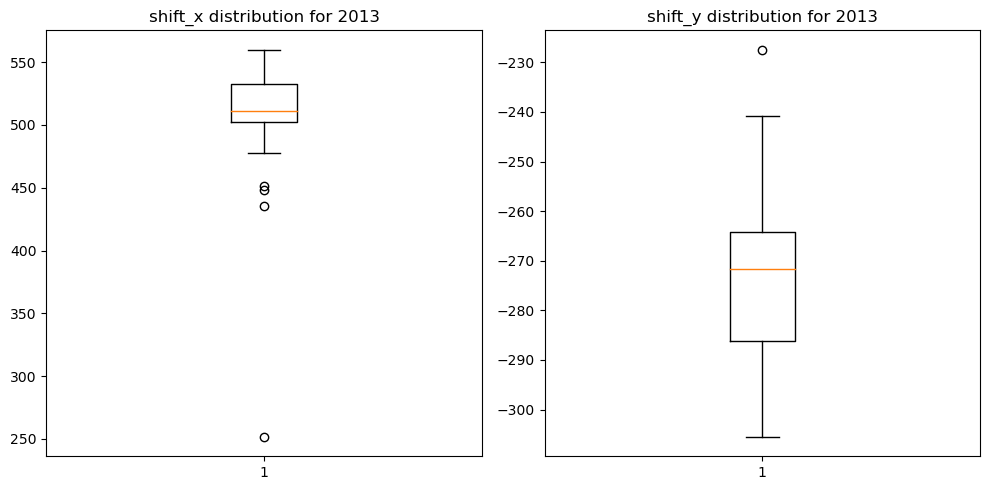

Province: 广西壮族自治区, Year: 2013
shift_x - Q1: 394.19, Median: 397.74, Q3: 404.46, len: 16
shift_y - Q1: -283.16, Median: -279.79, Q3: -269.91, len: 16


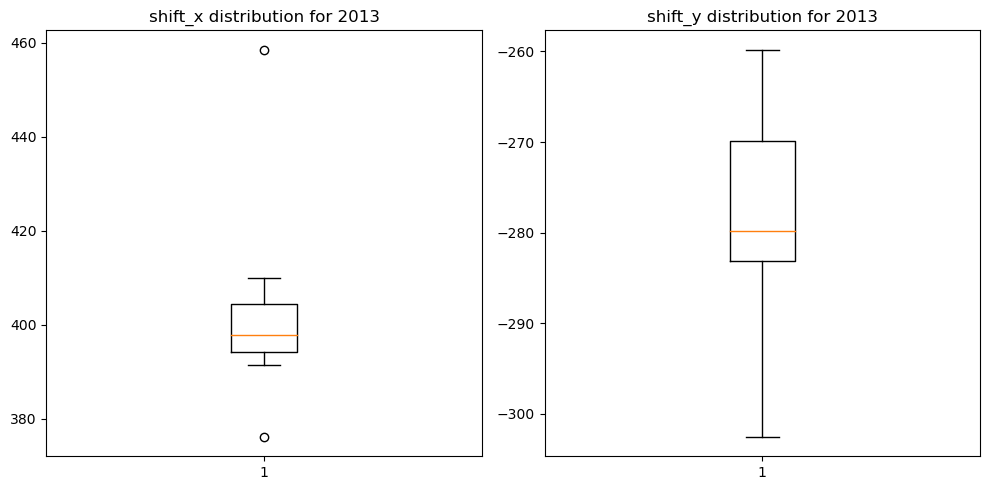

Province: 新疆维吾尔自治区, Year: 2013
shift_x - Q1: 199.11, Median: 284.01, Q3: 289.25, len: 33
shift_y - Q1: -11.30, Median: 117.94, Q3: 125.49, len: 33


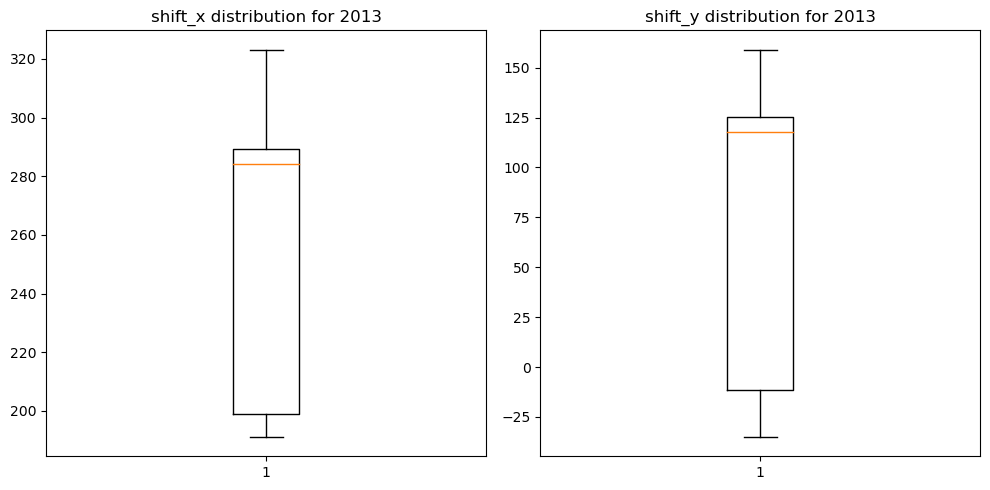

Province: 江苏省, Year: 2013
shift_x - Q1: 460.33, Median: 506.94, Q3: 545.41, len: 46
shift_y - Q1: -203.71, Median: -188.42, Q3: -177.34, len: 46


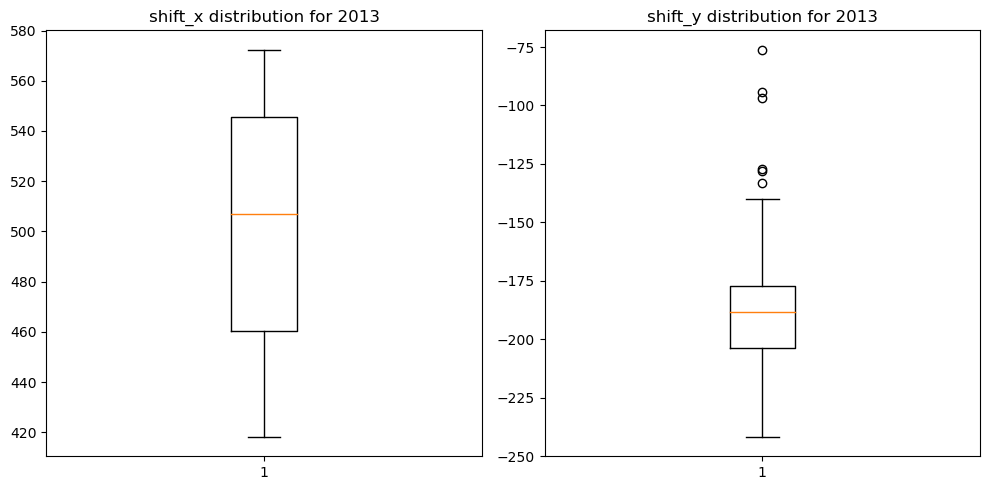

Province: 江西省, Year: 2013
shift_x - Q1: 483.48, Median: 489.14, Q3: 497.27, len: 13
shift_y - Q1: -330.18, Median: -324.02, Q3: -312.08, len: 13


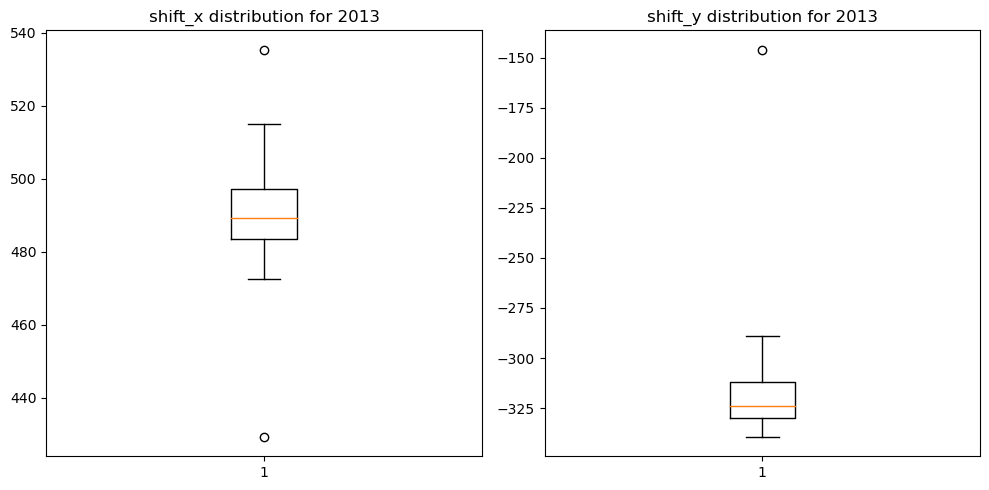

Province: 河北省, Year: 2013
shift_x - Q1: 592.53, Median: 609.83, Q3: 622.44, len: 21
shift_y - Q1: 56.99, Median: 71.49, Q3: 99.20, len: 21


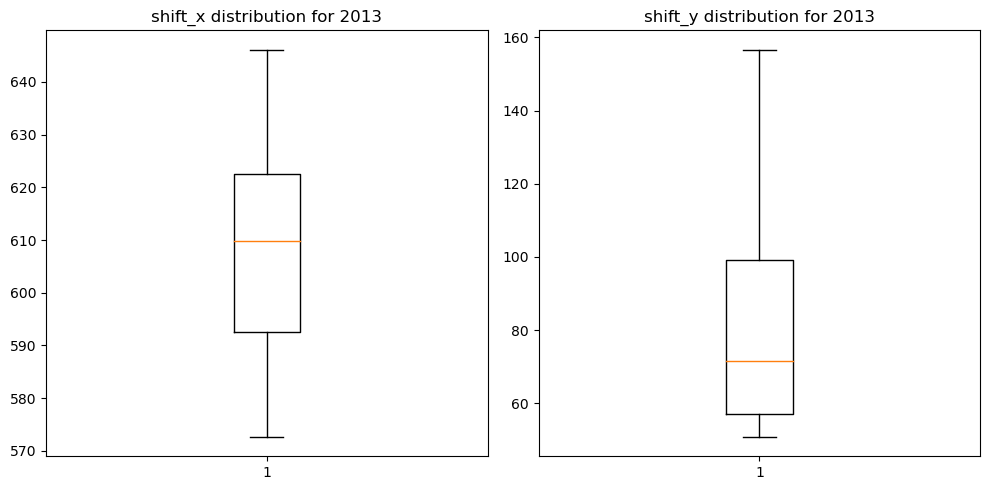

Province: 河南省, Year: 2013
shift_x - Q1: 591.00, Median: 606.10, Q3: 621.01, len: 13
shift_y - Q1: -118.08, Median: -102.58, Q3: -92.71, len: 13


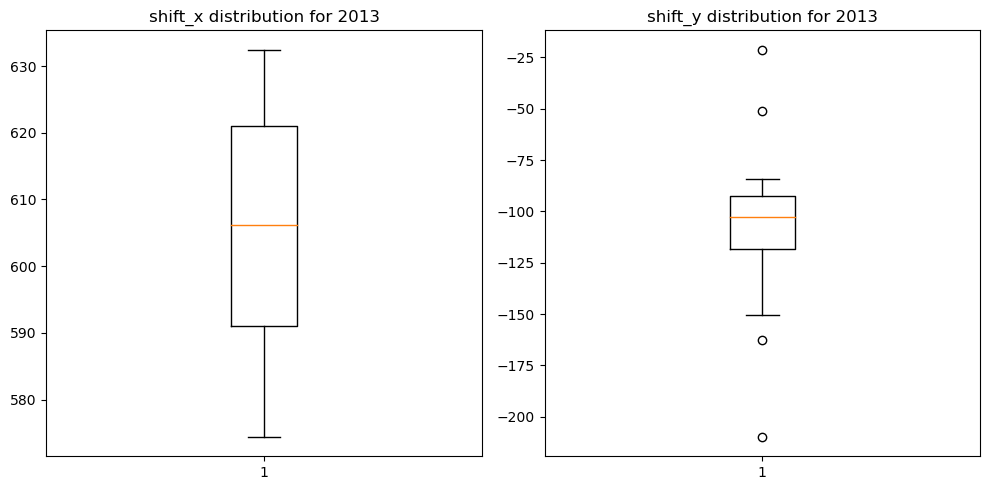

Province: 浙江省, Year: 2013
shift_x - Q1: 424.59, Median: 448.34, Q3: 473.51, len: 67
shift_y - Q1: -266.16, Median: -244.00, Q3: -231.72, len: 67


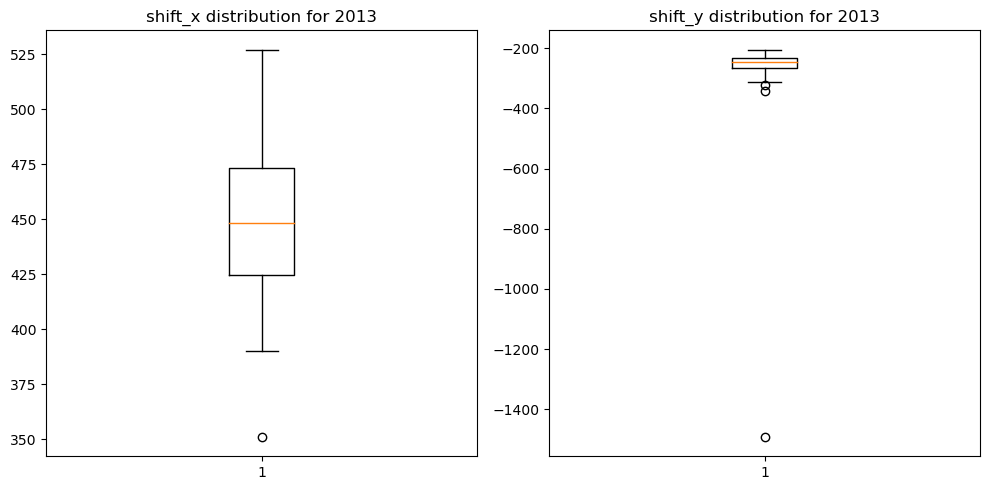

Province: 海南省, Year: 2013
shift_x - Q1: 409.63, Median: 423.71, Q3: 435.81, len: 10
shift_y - Q1: -196.87, Median: -176.92, Q3: -168.22, len: 10


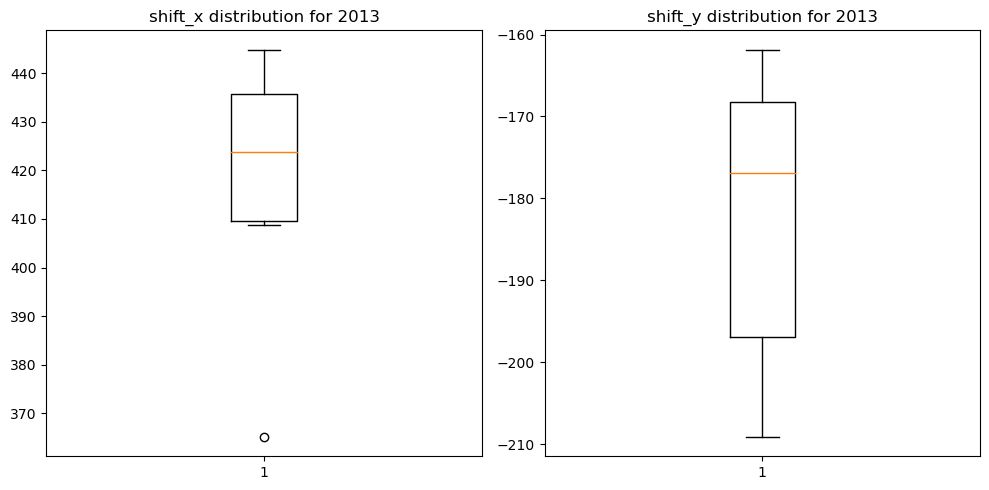

Province: 湖北省, Year: 2013
shift_x - Q1: 506.91, Median: 542.34, Q3: 560.46, len: 32
shift_y - Q1: -250.81, Median: -240.93, Q3: -229.48, len: 32


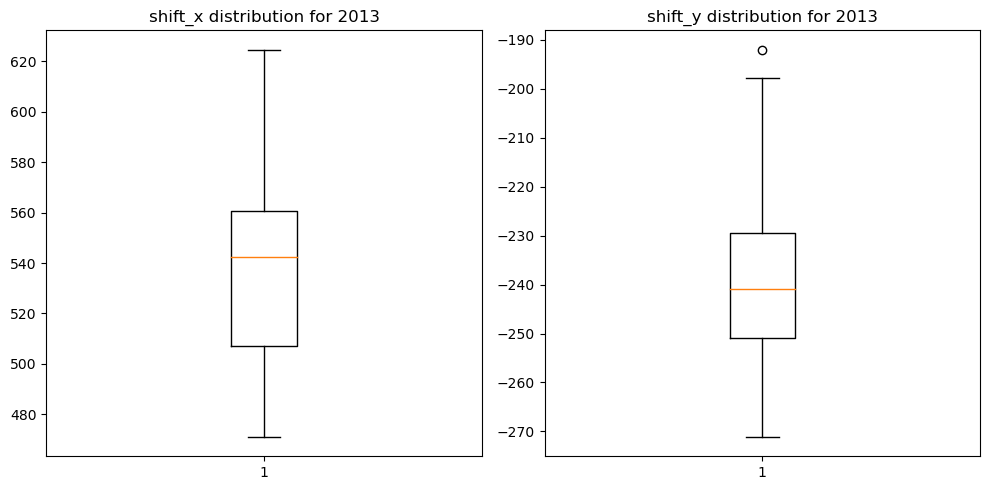

Province: 湖南省, Year: 2013
shift_x - Q1: 557.27, Median: 561.60, Q3: 591.95, len: 18
shift_y - Q1: -331.92, Median: -320.48, Q3: -266.64, len: 18


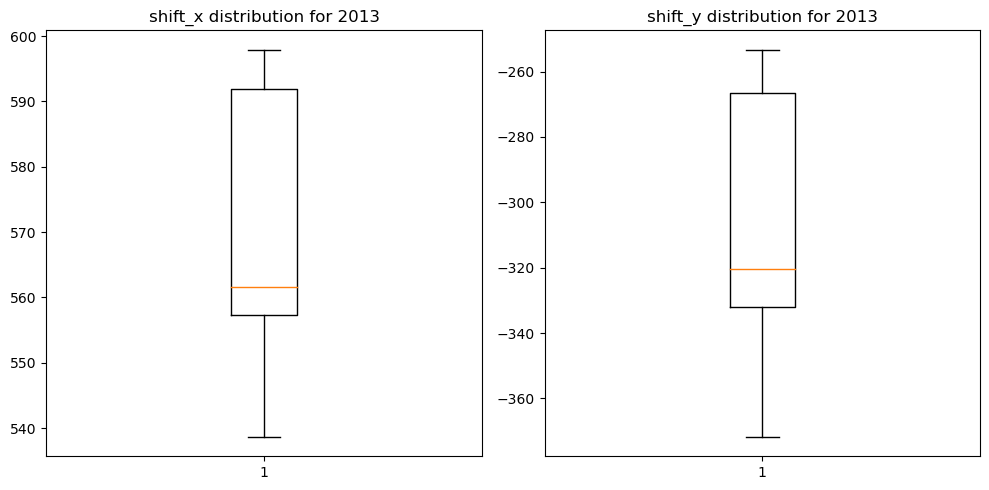

Province: 甘肃省, Year: 2013
shift_x - Q1: 243.65, Median: 270.71, Q3: 304.12, len: 9
shift_y - Q1: -26.42, Median: -8.35, Q3: 9.16, len: 9


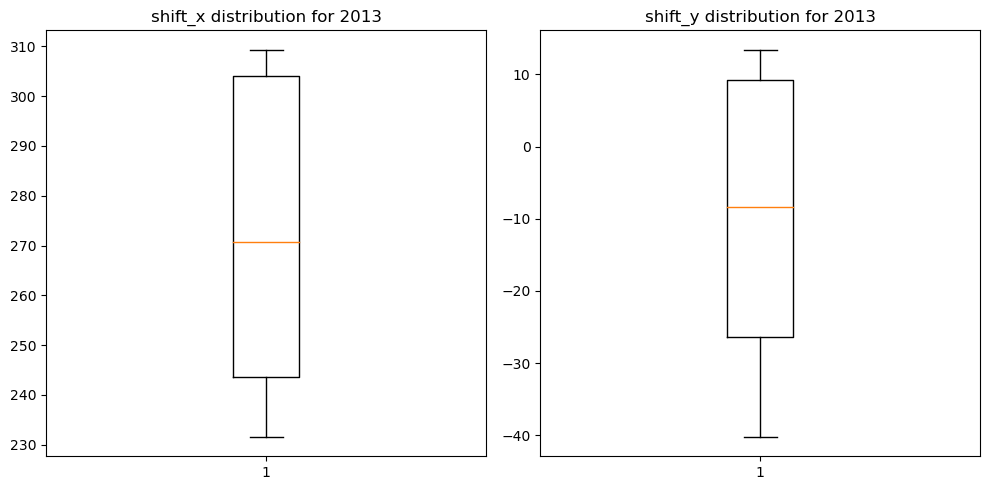

Province: 福建省, Year: 2013
shift_x - Q1: 489.34, Median: 490.00, Q3: 490.88, len: 5
shift_y - Q1: -281.17, Median: -272.12, Q3: -269.38, len: 5


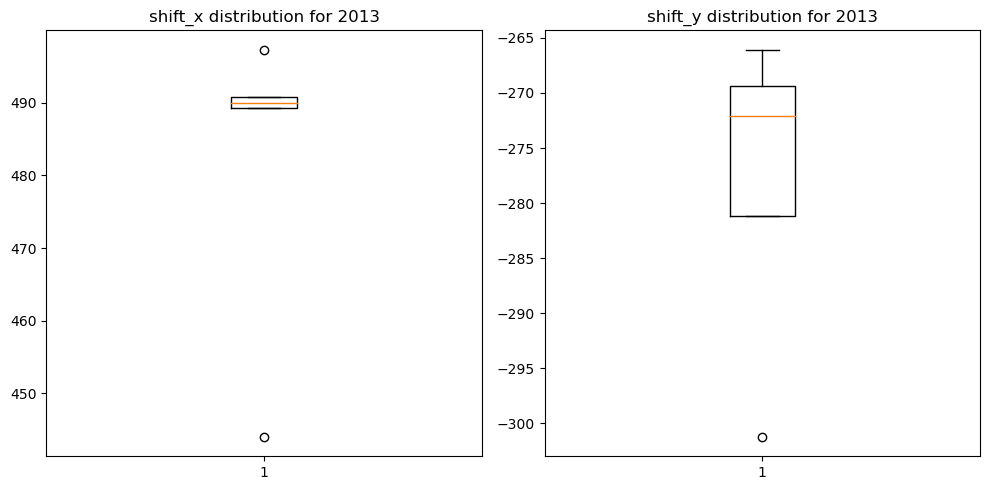

Province: 西藏自治区, Year: 2013
shift_x - Q1: 123.01, Median: 123.01, Q3: 123.01, len: 1
shift_y - Q1: -307.37, Median: -307.37, Q3: -307.37, len: 1


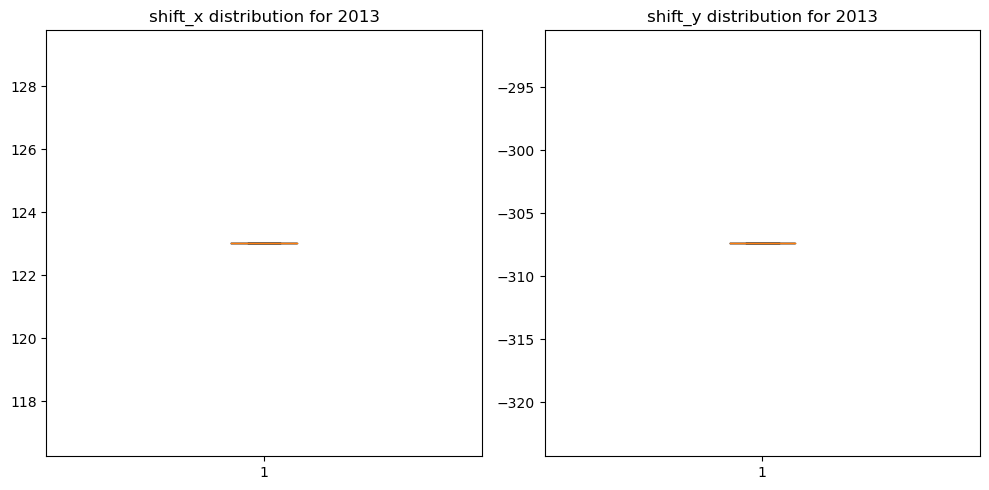

Province: 贵州省, Year: 2013
shift_x - Q1: 411.56, Median: 411.56, Q3: 411.56, len: 1
shift_y - Q1: -346.89, Median: -346.89, Q3: -346.89, len: 1


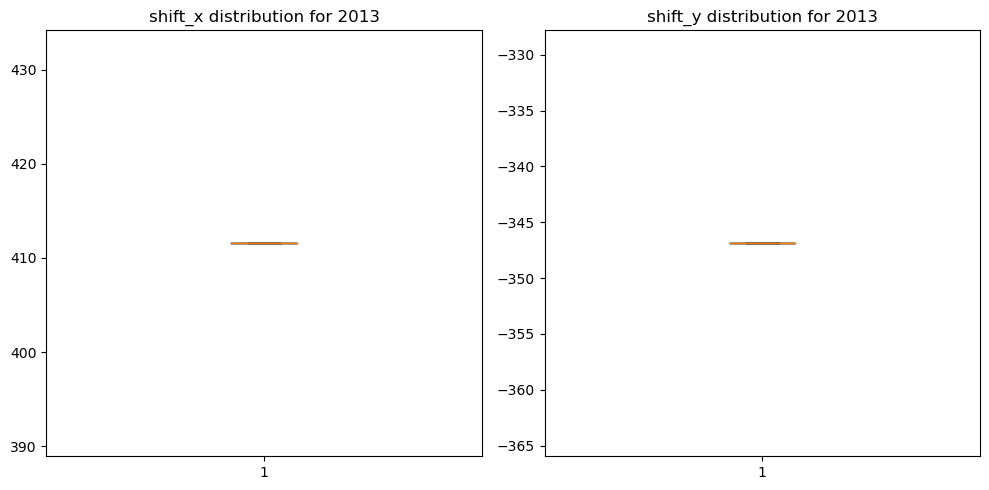

Province: 辽宁省, Year: 2013
shift_x - Q1: 527.59, Median: 576.41, Q3: 596.69, len: 28
shift_y - Q1: 145.01, Median: 208.44, Q3: 232.86, len: 28


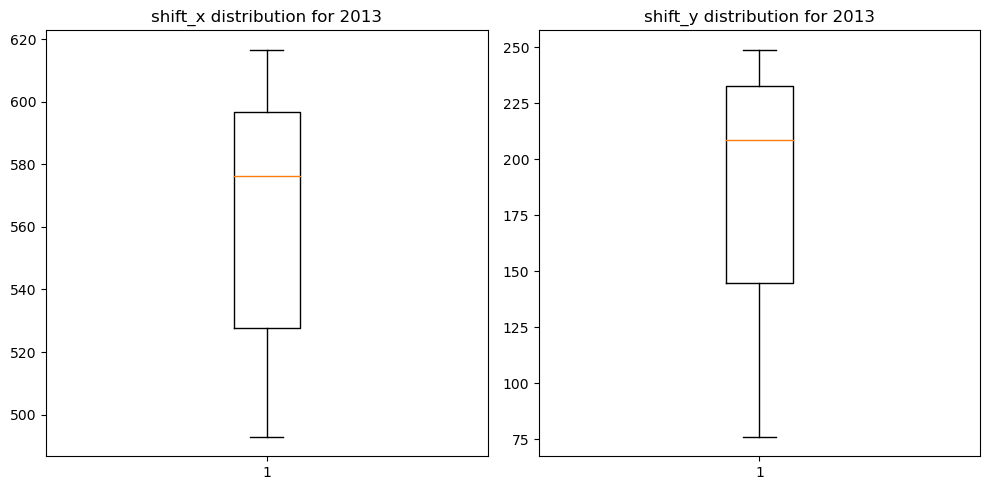

Province: 重庆市, Year: 2013
shift_x - Q1: 357.02, Median: 385.37, Q3: 393.20, len: 9
shift_y - Q1: -285.07, Median: -274.17, Q3: -263.24, len: 9


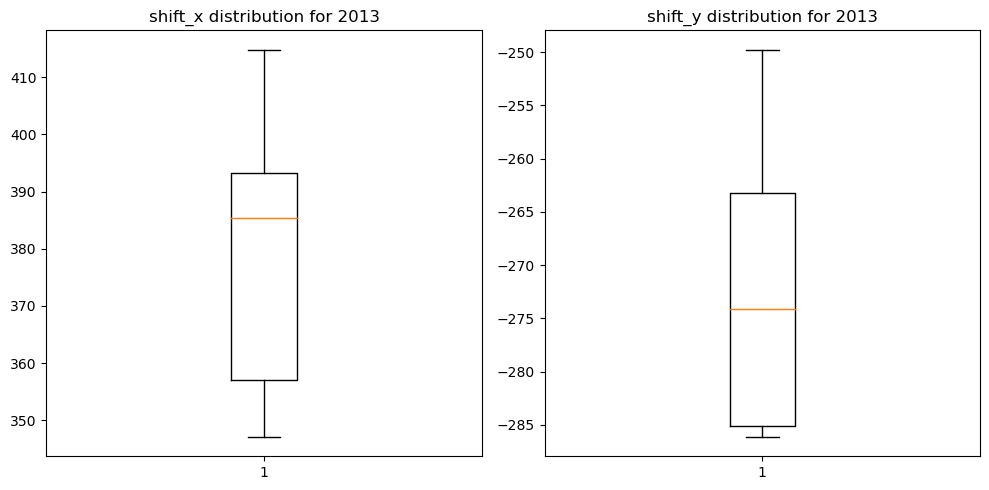

Province: 陕西省, Year: 2013
shift_x - Q1: 481.29, Median: 485.67, Q3: 494.12, len: 5
shift_y - Q1: -137.94, Median: -129.11, Q3: -100.10, len: 5


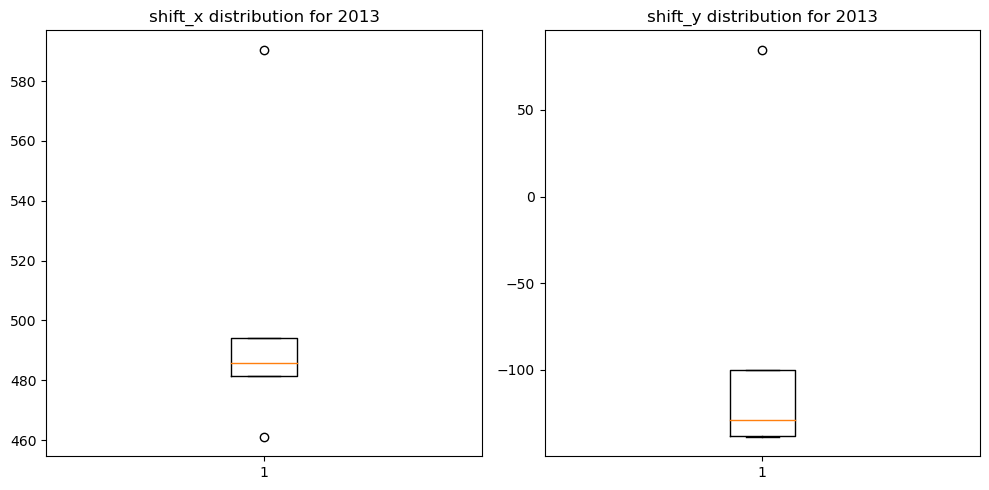

Province: 青海省, Year: 2013
shift_x - Q1: 92.45, Median: 128.21, Q3: 147.11, len: 16
shift_y - Q1: -150.14, Median: -47.77, Q3: 4.85, len: 16


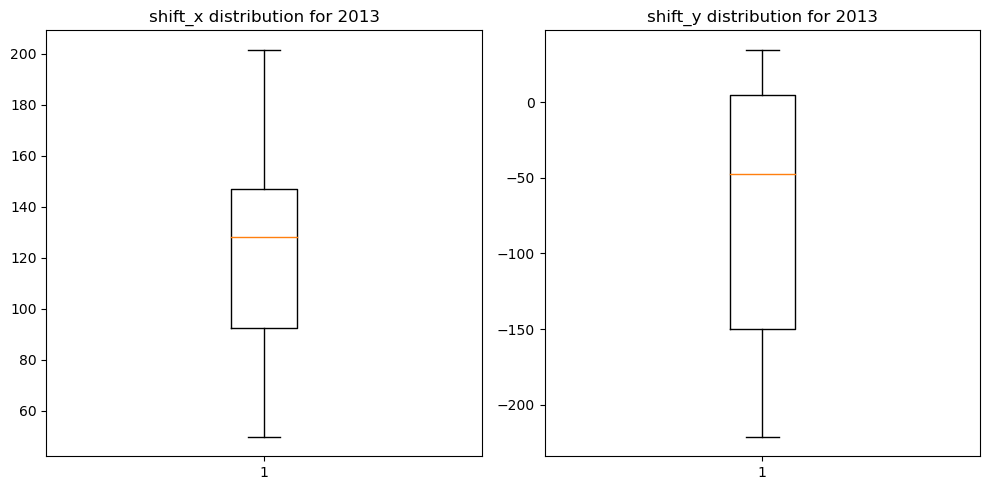

Province: 黑龙江省, Year: 2013
shift_x - Q1: 598.65, Median: 613.96, Q3: 637.51, len: 21
shift_y - Q1: 194.81, Median: 201.52, Q3: 210.18, len: 21


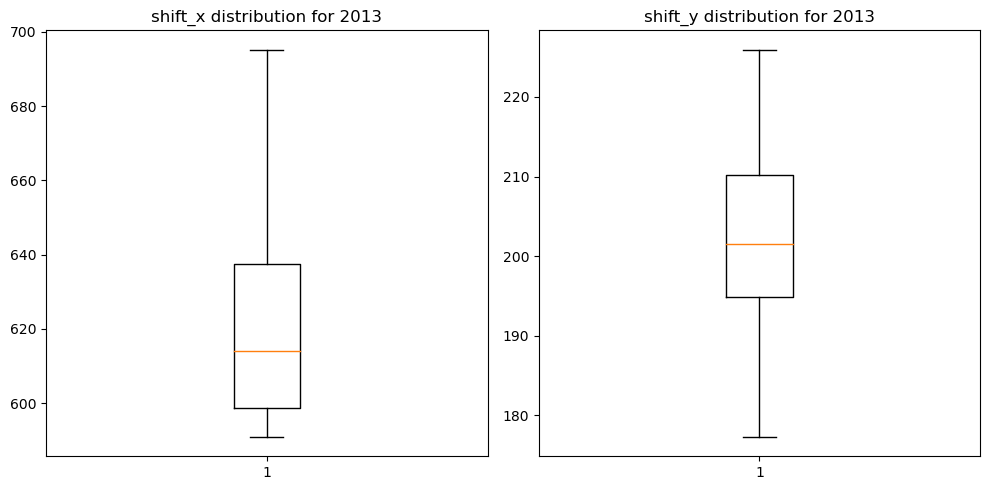

In [12]:
tmp_year = 2013
for province in GS_anchor_results[tmp_year]['pname'].unique():
    tmp_data = GS_anchor_results[tmp_year][GS_anchor_results[tmp_year]['pname'] == province]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    print(f"Province: {province}, Year: {tmp_year}")
    for i, col in enumerate(['shift_x', 'shift_y']):
        axes[i].boxplot(tmp_data[col].dropna())
        axes[i].set_title(f"{col} distribution for {tmp_year}")
        q1 = tmp_data[col].quantile(0.25)
        median = tmp_data[col].median()
        q3 = tmp_data[col].quantile(0.75)
        print(f"{col} - Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}, len: {len(tmp_data[col])}")
    plt.tight_layout()
    plt.show()

shift_x - Q1: -0.80, Median: 0.15, Q3: 1.10, len: 84074
shift_y - Q1: -0.95, Median: -0.14, Q3: 0.66, len: 84074


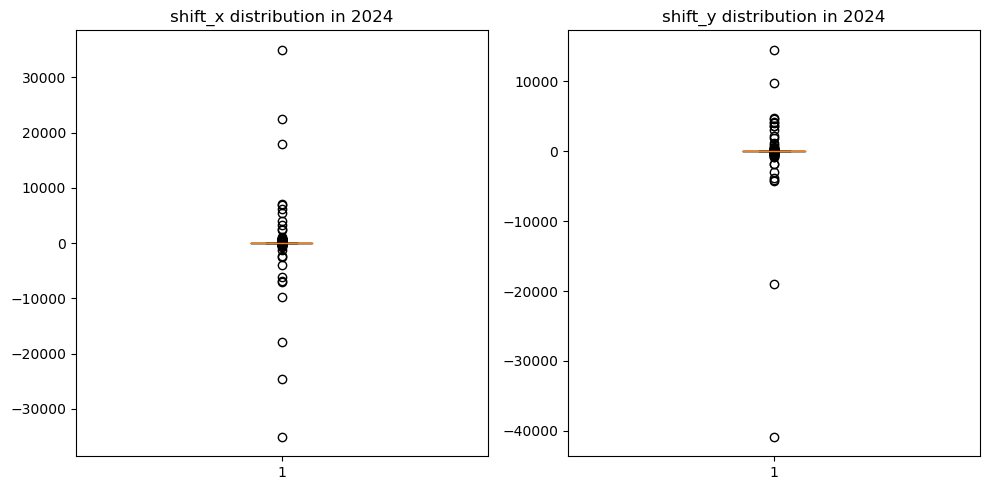

In [13]:
# Example usage:
plot_anchor_shift_distribution(GS_anchor_results, 2024)

2014
shift_x - Q1: -0.30, Median: 0.00, Q3: 0.30, len: 1155
shift_y - Q1: -0.20, Median: -0.10, Q3: 0.10, len: 1155


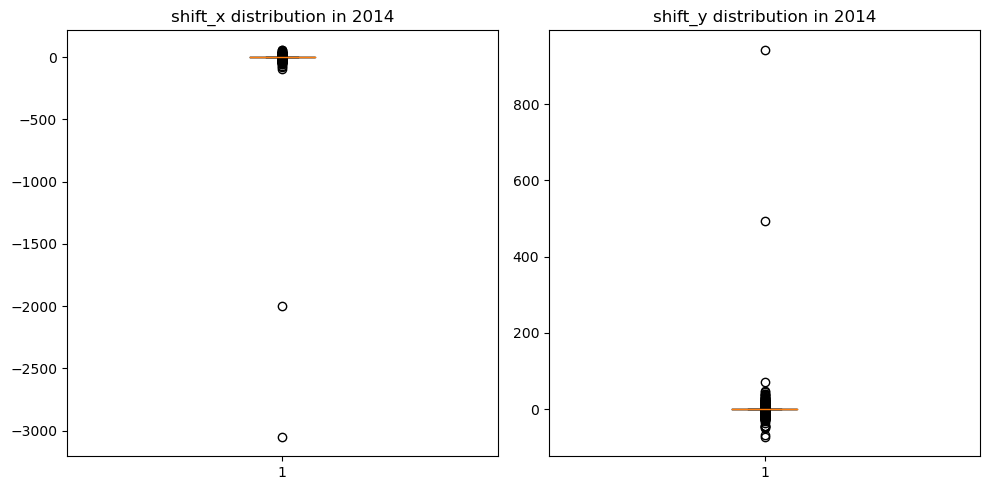

2015
shift_x - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 117035
shift_y - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 117035


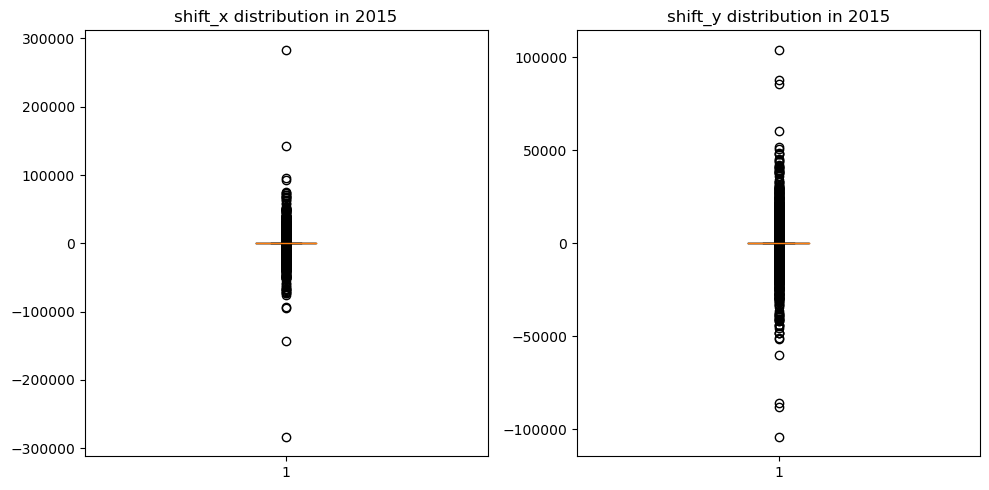

2017
shift_x - Q1: -3.69, Median: -0.06, Q3: 2.92, len: 17682
shift_y - Q1: -4.10, Median: -0.18, Q3: 1.89, len: 17682


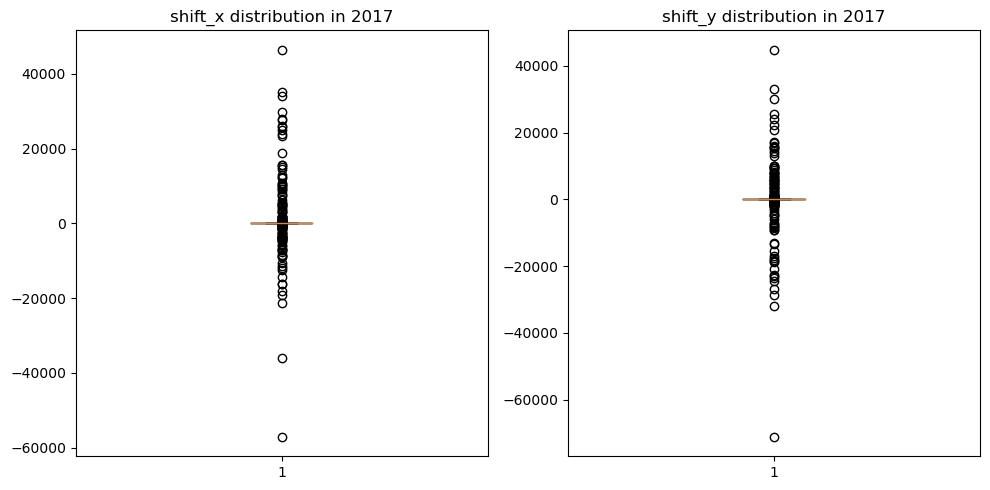

2018
shift_x - Q1: -3.39, Median: -0.00, Q3: 2.61, len: 32568
shift_y - Q1: -2.70, Median: -0.00, Q3: 2.31, len: 32568


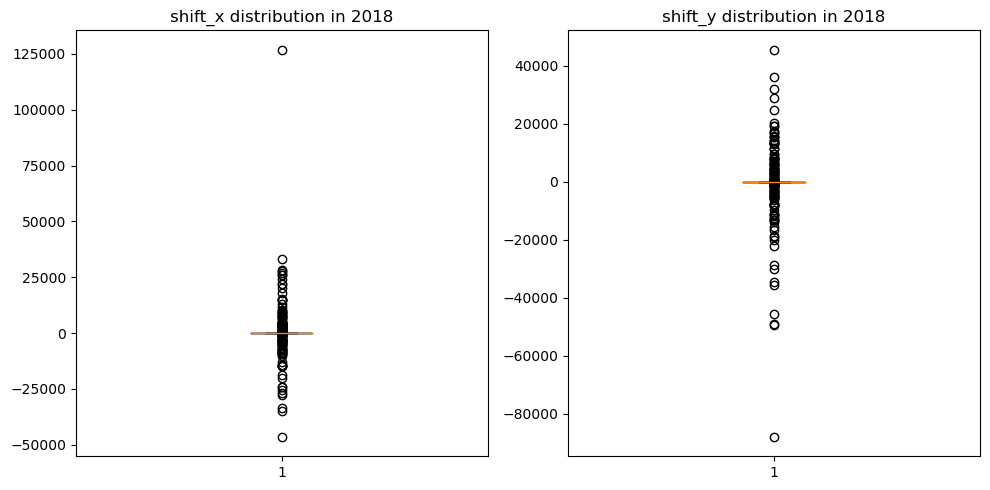

2019
shift_x - Q1: -1.11, Median: -0.01, Q3: 1.12, len: 52716
shift_y - Q1: -0.92, Median: 0.01, Q3: 0.95, len: 52716


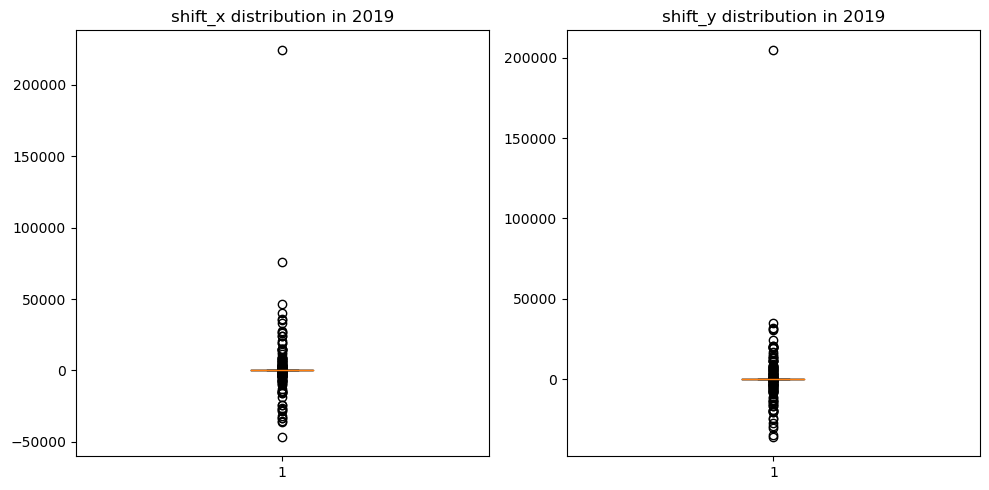

2022
shift_x - Q1: -0.75, Median: 0.00, Q3: 0.77, len: 89871
shift_y - Q1: -0.64, Median: 0.00, Q3: 0.67, len: 89871


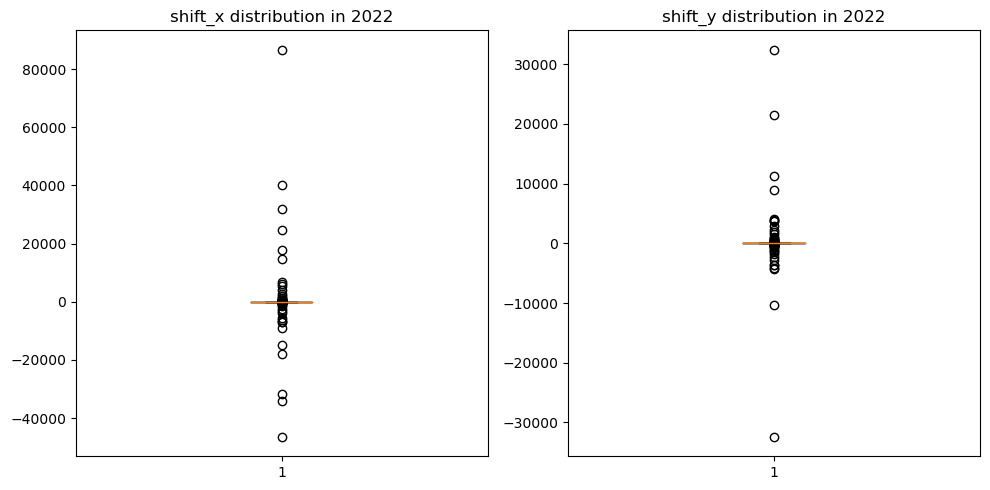

2023
shift_x - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 101625
shift_y - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 101625


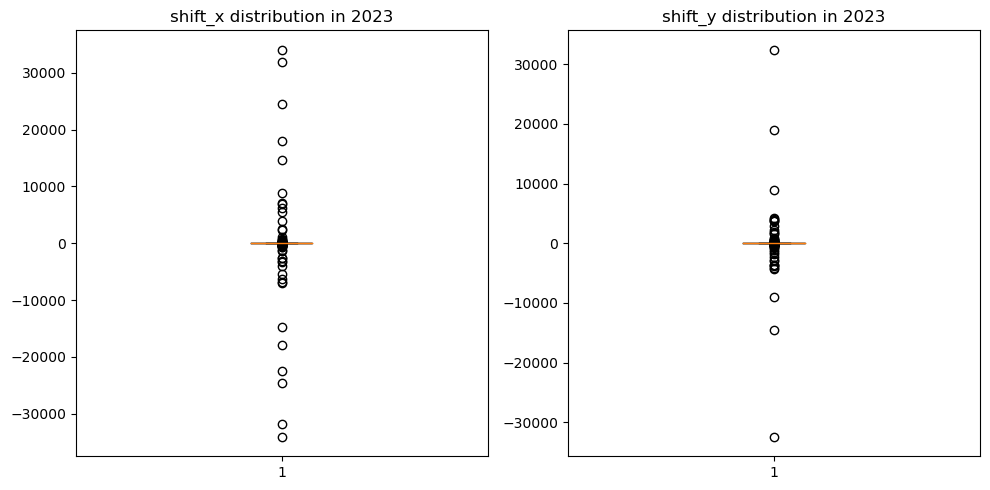

In [14]:
for year in [2014,2015,2017,2018,2019,2022,2023]:
    print(year)
    plot_anchor_shift_distribution(GS_anchor_results, year)

2015
shift_x - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 1761
shift_y - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 1761


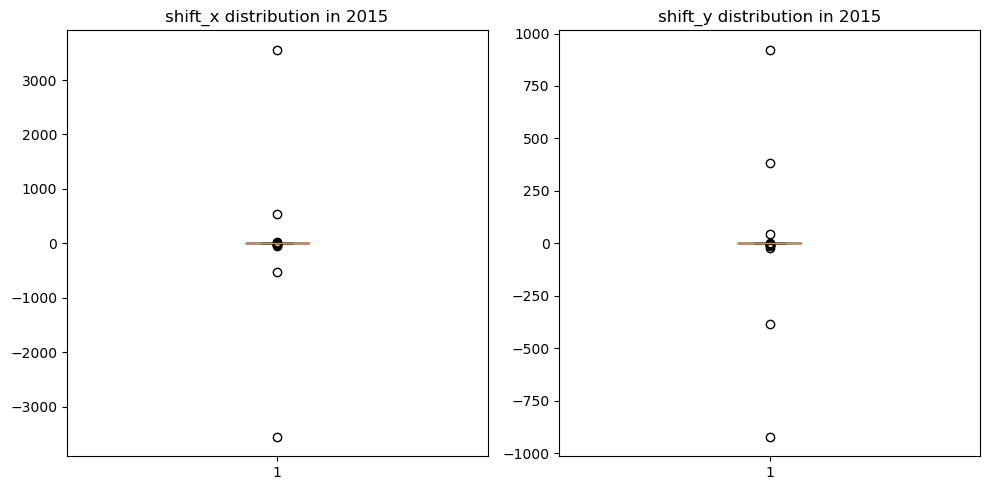

2017
shift_x - Q1: -1.28, Median: 0.02, Q3: 0.99, len: 337
shift_y - Q1: -0.90, Median: 0.15, Q3: 1.02, len: 337


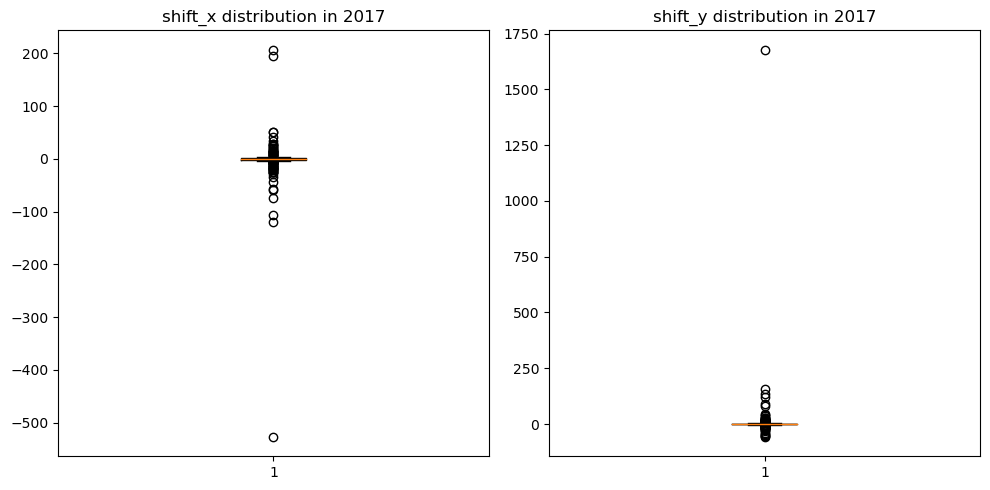

2018
shift_x - Q1: -0.00, Median: -0.00, Q3: 0.00, len: 12391
shift_y - Q1: -0.00, Median: -0.00, Q3: 0.00, len: 12391


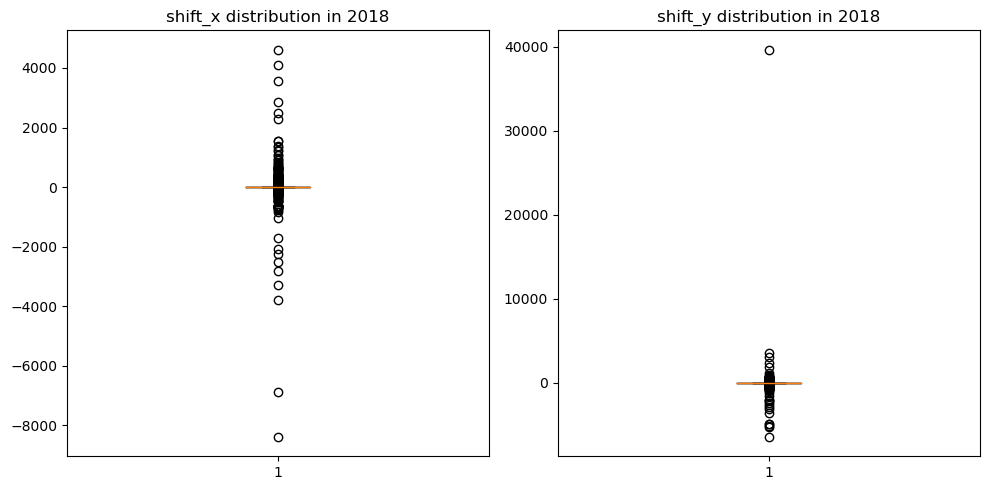

2019
shift_x - Q1: -0.96, Median: -0.01, Q3: 1.06, len: 24173
shift_y - Q1: -0.87, Median: -0.03, Q3: 0.89, len: 24173


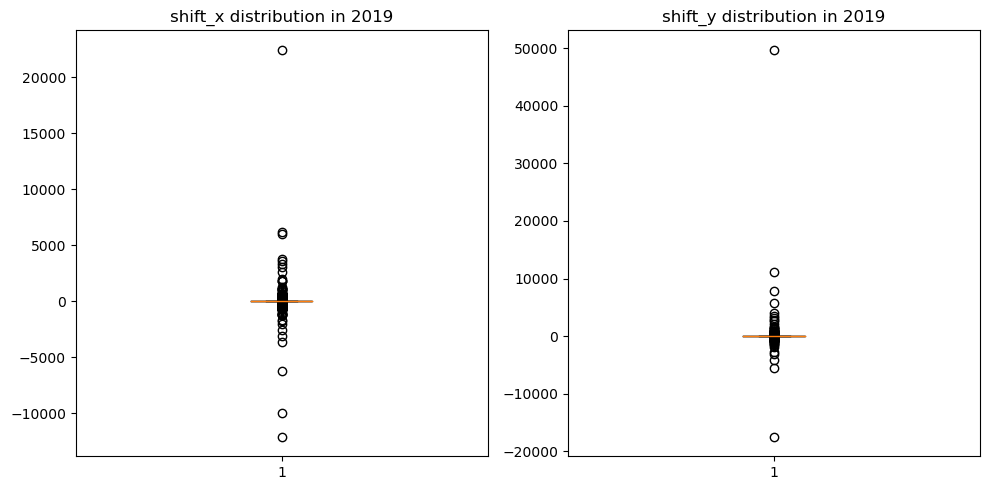

2022
shift_x - Q1: -0.62, Median: 0.00, Q3: 0.67, len: 43037
shift_y - Q1: -0.60, Median: 0.00, Q3: 0.56, len: 43037


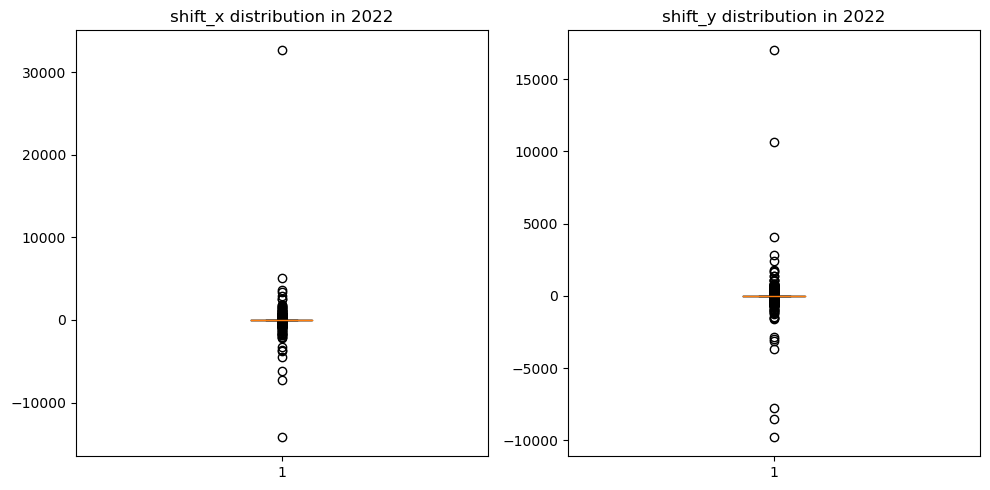

2023
shift_x - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 73726
shift_y - Q1: 0.00, Median: 0.00, Q3: 0.00, len: 73726


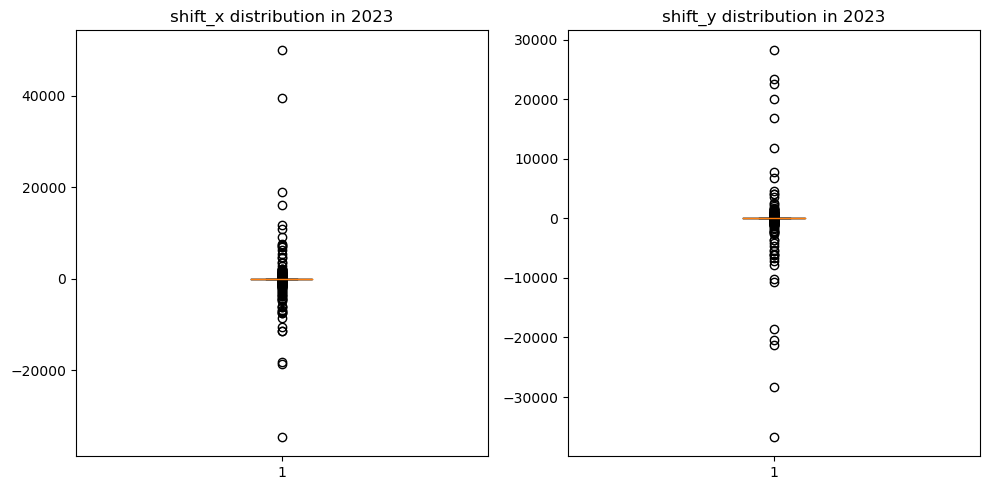

In [15]:
for year in [2015,2017,2018,2019,2022,2023]:
    print(year)
    plot_anchor_shift_distribution(CS_anchor_results, year)